In [1]:
import os
import numpy as np
from matplotlib import ticker, cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.path as mpath
from copy import copy
import seaborn as sn
#from scipy import ndimage
from scipy.interpolate import griddata, NearestNDInterpolator
from numpy import uint32, uint64, float64, float32, linspace, array, logspace, sin, cos, pi, arange
from arepy.read_write import binary_read as rsnap
from arepy.visualize import data_inspection as vis
from arepy.utility import snap_utility as snut
from scipy.optimize import curve_fit
from matplotlib import gridspec
from arepy.utility import cgs_constants as cgs
from scipy.spatial import Voronoi, Delaunay, ConvexHull, voronoi_plot_2d
from matplotlib import ticker
plt.style.use('classic')

In [2]:
### constants: 
kb = 1.38e-23
kb_cgs = 1.38e-16
mH = 1.67e-24
mu = 2.8
h = 6.626e-34
h_cgs = 6.62e-27
gamma = 5./3.
pc2cm = 3.086e18
msun2g = 2e33

arepoLength = 3.0856e20
arepoMass = 1.991e33
arepoVel = 1.0e5

arepoTime = arepoLength/arepoVel
arepoDensity = arepoMass/arepoLength/arepoLength/arepoLength
arepoEnergy= arepoMass*arepoVel*arepoVel
arepoColumnDensity = arepoMass/arepoLength/arepoLength

In [6]:
out_path = '/beegfs/work/workspace/ws/hd_rm238-m_production-0/sim_fast/OUTPUT/'
save_path = '/beegfs/work/workspace/ws/hd_rm238-m_production-0/sim_fast/anal/'
rsnap.io_flags['sgchem'] = True
rsnap.io_flags['mc_tracer']=True
data, header = rsnap.read_snapshot(out_path+'whole_disk_175')
for key, value in data_test.items():
    print key

Loading file /beegfs/work/workspace/ws/hd_rm238-m_production-0/sim_fast/OUTPUT/whole_disk_175
Particles [ 53932202         0 117899847         0         0         0]
Masses [0.         0.         5.34576263 0.         0.         0.        ]
Gas particles 53932202
Tracer particles 117899847
Time =  [1.3750967]
Precision: Float
ID type:  <type 'numpy.uint64'>
ID type:  <type 'numpy.uint64'>
ID type:  <type 'numpy.uint64'>
u_therm
chem
tracerid
pos
tdust
mass
rho
parentid
vel
numtrace
id


2.7726862e-38 2.1881054e-16
(53932202, 3)
(601, 601, 11)


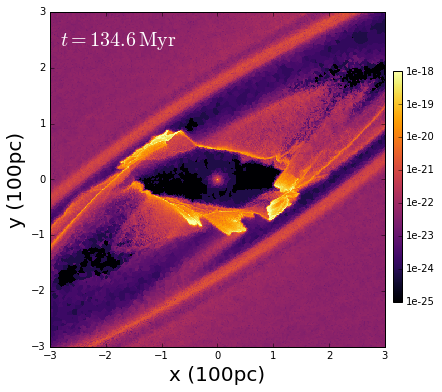

In [7]:
t = header['time']
x,y,z=data['pos'].T
x,y,z = x-120.0, y-120.0, z-120.0
rho = data['rho']*arepoDensity
print min(rho), max(rho)
masses = data['mass']
vx,vy,vz = data['vel'].T
energy_per_unit_mass = data['u_therm']

lowerx
### grab region of interest
cloud_reg = np.where( (x>lowerx) & (x<upperx) & (y>lowery) & (y<uppery) & (rho>4e8))

points = np.vstack((x,y,z)).T
print points.shape
rhof = NearestNDInterpolator(points,rho)

Nx, Ny, Nz = 601, 601, 11
plotrange=3
xboost = 0
yboost = 0
zslice=5
xgrid, ygrid, zgrid = linspace(-plotrange,plotrange,Nx), linspace(-plotrange,plotrange,Ny), linspace(-10,10,Nz)
XGRID,YGRID,ZGRID = np.meshgrid(xgrid,ygrid,zgrid)
RHO = rhof(XGRID,YGRID,ZGRID)
print RHO.shape

# plot
fig, ax = plt.subplots(1,1,figsize=(6,8))
u = 1.0
extent = (xgrid.min()/u,xgrid.max()/u,ygrid.min()/u,ygrid.max()/u)
levels = logspace(2,6,256)
norm = colors.LogNorm(vmin=np.min(1e-25),vmax=np.max(1e-18))
im = ax.imshow(RHO[:,:,zslice],origin='l',norm=norm,extent=extent,cmap='inferno',interpolation='nearest')

ax.set_xlabel(r'x (100pc)',fontsize=20)
ax.set_ylabel(r'y (100pc)',fontsize=20)
ax.annotate(r'$t=%.1f\,\rm Myr$'%(t*97.856),xy=(0.03,0.9),xycoords='axes fraction',fontsize=20,color='w')
fig.subplots_adjust(right=0.9)
fig.subplots_adjust(wspace=0.0,hspace=0.0)
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
cbar = plt.colorbar(im,cax=cbar_ax,ticks = [1e-25,1e-24,1e-23,1e-22,1e-21,1e-20,1e-19,1e-18],format='%.0e')